In [2]:
from glob import glob
import numpy as np

In [3]:
from lightkurve import KeplerTargetPixelFile
from astropy.coordinates import SkyCoord

In [3]:
#fnames = np.sort(glob('data/*.fits'))
#tpf = KeplerTargetPixelFile.from_fits_images(images=fnames,
  #                                           position=SkyCoord(257.13700, 24.48958, unit='deg'),
  ##                                           size=(9,9),
         #                                    target_id='MyCutOut')

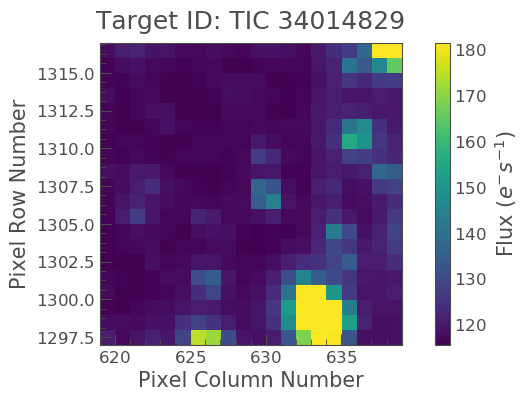

In [3]:
import lightkurve as lk

tpf = lk.search_tesscut('TIC 34014829').download(cutout_size=20)

tpf
tpf.plot()

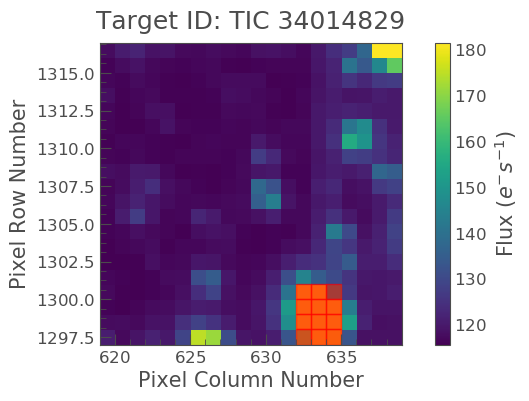

In [14]:
import numpy as np
aper = np.zeros(tpf.shape[1:], dtype=np.int)
aper[0:4, 13:16] = 1
tpf.plot(aperture_mask=aper, mask_color='red');

(0.99, 1.01)

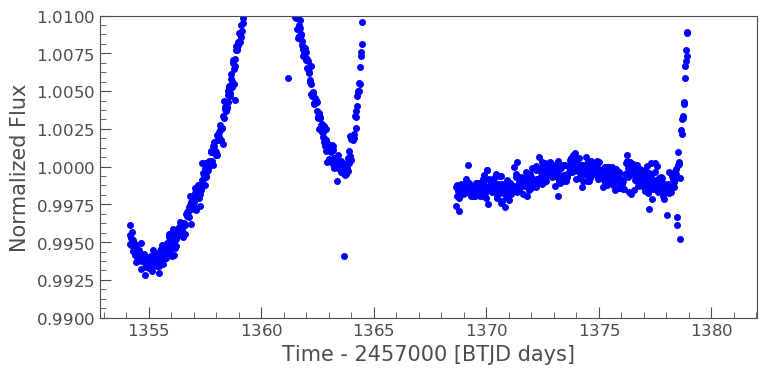

In [15]:
import matplotlib.pyplot as plt

# Build the NEW aperture, and the light curve
user_lc = tpf.to_lightcurve(aperture_mask=aper.astype(bool))
# Clean the light curve
user_lc = user_lc.remove_nans().remove_outliers()
user_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')
plt.ylim(0.99,1.01)
